In [34]:
import nltk
# nltk.download('punkt', download_dir='NLTK_DATA')
# nltk.download('stopwords', download_dir='NLTK_DATA')
nltk.data.path.append("NLTK_DATA")
import pandas as pd
import numpy as np
from processing import *
from sentiment2 import *

# PREPARASI *TRAINING DATASET*

In [8]:
# TODO: pindah ke sqlite
dataset = pd.read_csv("dataset/training_dataset.csv")
all_pos = dataset[dataset['label'] == 1]
all_neg = dataset[dataset['label'] == 0]

# * Training data: 80% pertama
# * Testing data: 20% terakhir
train_pos = all_pos[:int(len(all_pos)*0.8)]
train_neg = all_neg[:int(len(all_neg)*0.8)]
test_pos = all_pos[-int(len(all_pos)*0.2):]
test_neg = all_neg[-int(len(all_neg)*0.2):]

train_x = train_pos.append(train_neg, ignore_index=True)
test_x = test_pos.append(test_neg, ignore_index=True)

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [9]:
# ld = len(dataset)
# trp = len(train_pos)
# tng = len(train_neg)
# tsp = len(test_pos)
# tsn = len(test_neg)
# print(f"dataset: {ld} \n train pos: {trp} \n train neg: {tng} \n test pos: {tsp} \n test neg: {tsn}")

# PELATIHAN *MODEL CLASSIFIER*

In [10]:
x = train_x['text']
y = train_y
kamus_frek = kamus_freq(x, y)

In [35]:
logprior, loglikelihood = train_nbc(kamus_frek, train_y)

TypeError: train_nbc() missing 1 required positional argument: 'train_y'

In [12]:
# file = open("/home/gaz/dev/flask-sk/database/prior.txt", "w")
# str = repr(logprior)
# file.write(str)
# file.close()

In [13]:
# like = pd.DataFrame(list(loglikelihood.items()), columns = ['kata', 'likelihood'])
# like.to_csv('/home/gaz/dev/flask-sk/database/loglikelihood.csv')

## HASIL PENGUJIAN MODEL
- data *training*
- data *testing*

In [14]:
# hasil_uji = test_nbc(x, y, logprior, loglikelihood)
# hasil_uji

In [15]:
# test = test_nbc(test_x['text'], test_y, logprior, loglikelihood)
# test

## UJI KESELURUHAN *DATASET*

In [16]:
# data_test = test_nbc(dataset['text'], dataset['label'], logprior, loglikelihood)
# data_test

## *CONFUSION MATRIX*

In [17]:
pdc = pd.DataFrame()
pdc = dataset
pdc['label_prediksi'] = pdc['text'].apply(lambda x: predict_nbc(x, logprior, loglikelihood))

In [18]:
# TODO: Do more testing with thresholds values from 0, 0.5, 0.8, 0.9, 1
# * to note;
# treshold = -0.03272669350255697
# * default treshold is 0
def toLabel(x):
   if x > 0:
       return 1
   elif x < 0:
       return 0
   else:
       return "n"
pdc['prediksi'] = pdc['label_prediksi'].apply(lambda x: toLabel(x))

In [19]:
tr = logprior
def toLabel(x):
   if x > tr:
       return 1
   elif x < tr:
       return 0
   else:
       return "n"
pdc['prediksi_tr'] = pdc['label_prediksi'].apply(lambda x: toLabel(x))

In [20]:
conf_matrix = pd.crosstab(pdc['label'], pdc['prediksi'], rownames=['Actual'], colnames=['Predicted'])
conf_matrix

Predicted,0,1
Actual,,
0,647,14
1,84,555


In [21]:
conf2 = pd.crosstab(pdc['label'], pdc['prediksi_tr'], rownames=['Actual'], colnames=['Predicted'])
conf2

Predicted,0,1
Actual,,
0,647,14
1,83,556


In [22]:
tp = 560
tn = 647
fp = 14
fn = 77
pop = tp+tn+fp+fn
acc = (tp+tn)/pop
mis = (fp+fn)/pop
pre = tp/(tp+fp)
sen = tp/(tp+fn)
print(f"akurasi: {acc}\nmis-klasifikasi: {mis}\npresisi: {pre}\nsensitivitas: {sen}")

akurasi: 0.9298921417565486
mis-klasifikasi: 0.07010785824345146
presisi: 0.975609756097561
sensitivitas: 0.8791208791208791


Matplotlib is building the font cache; this may take a moment.


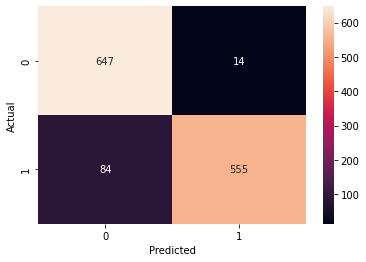

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

# UJI CLASSIFIER PADA ARTIKEL BERITA

In [24]:
berita = open('berita.txt', 'r')
berita = berita.read()

In [25]:
beritanormal = normalisasi(berita)
frekberita = freqs(beritanormal)
# frekberita

## SENTIMEN ARTIKEL KESELURUHAN

In [26]:
predict_nbc(berita, logprior, loglikelihood)

-33.43289827912097

## SENTIMEN ARTIKEL PER_KALIMAT

In [27]:
from nltk.tokenize import sent_tokenize
x = pd.DataFrame()
kalimat = sent_tokenize(berita)
x['kalimat'] = kalimat
x['kalimat_normal'] = x['kalimat'].apply(lambda x: normalisasi(x))

In [28]:
x['label_prediksi'] = x['kalimat'].apply(lambda x: predict_nbc(x, logprior, loglikelihood))

In [29]:
x

,kalimat,kalimat_normal,label_prediksi
0,"BEIJING, KOMPAS.com - China pada Selasa (10/8/...","[beijing, kompas, china, selasa, tari, utus, l...",-2.345557
1,Taiwan pada Juli mengatakan akan mendirikan ka...,"[taiwan, juli, kantor, wakil, vilnius, kota, l...",-2.631531
2,China menganggap Taiwan bukanlah negara yang b...,"[china, anggap, taiwan, negara, daulat, wilayah]",-2.521048
3,Kementerian Luar Negeri China marah dan pada S...,"[menteri, negeri, china, marah, selasa, perint...",1.176839
4,Keputusan Lithuania mengizinkan Taiwan mendiri...,"[putus, lithuania, izin, taiwan, kantor, wakil...",-2.183537
5,"Selain itu, Kementerian Luar Negeri China meni...","[menteri, negeri, china, nilai, lithuania, ber...",-3.240828
6,China yang mengklaim Taiwan sebagai bagiannya ...,"[china, klaim, taiwan, janji, rebut, keras]",-1.711825
7,China mencoba membuat Taiwan tetap terisolasi ...,"[china, coba, taiwan, isolasi, panggung, dunia...",-1.746012
8,Kementerian Luar Negeri China pada Selasa (10/...,"[menteri, negeri, china, selasa, desak, lithua...",0.664306
9,Kementerian Luar Negeri Lithuania menanggapi d...,"[menteri, negeri, lithuania, tanggap, kecewa, ...",-1.541926


## SENTIMEN ARTIKEL PER_KATA

In [30]:
berita_normal = normalisasi(berita)

In [31]:
# * predict_nbc per-kata
def predict_perkata(text, logpri, loglik):
    l = []
    for w in text:
        x = predict_nbc(w, logpri, loglik)
        l.append({
            w,
            x
            })
    return l

In [32]:
predict_perkata(berita_normal, logprior, loglikelihood)

[{-0.03272669350255697, 'beijing'},
 {-0.03272669350255697, 'kompas'},
 {-0.03272669350255697, 'china'},
 {-0.03272669350255697, 'selasa'},
 {0.658713030751838, 'tari'},
 {-0.03272669350255697, 'utus'},
 {-0.03272669350255697, 'lithuania'},
 {-0.03272669350255697, 'beijing'},
 {-0.03272669350255697, 'vilnius'},
 {-0.03272669350255697, 'izin'},
 {-0.03272669350255697, 'taiwan'},
 {-0.03272669350255697, 'kantor'},
 {-1.8261936190361623, 'negara'},
 {-0.5452597735740978, 'buah'},
 {0.658713030751838, 'langkah'},
 {-0.03272669350255697, 'anggap'},
 {-0.7275813303680526, 'provokatif'},
 {-0.7275813303680526, 'perintah'},
 {-0.03272669350255697, 'china'},
 {-0.03272669350255697, 'taiwan'},
 {-0.03272669350255697, 'juli'},
 {-0.03272669350255697, 'kantor'},
 {-0.7275813303680526, 'wakil'},
 {-0.03272669350255697, 'vilnius'},
 {-0.7275813303680525, 'kota'},
 {-0.03272669350255697, 'lithuania'},
 {-0.5452597735740978, 'buah'},
 {0.658713030751838, 'langkah'},
 {-0.03272669350255697, 'anggap'},
